### 2

Let $X_1, \cdots, X_n \sim \text{Uniform}(a, b)$ where $a$ and $b$ are unknown parameters and $a<b$. 

2. Find the MLE $\hat a$ and $\hat b$
3. Let $\tau = \int x\text{d}F(x)$. Find the MLE of $\tau$.
4. Let $\hat \tau$ be the MLE of $\tau$. Let $\tilde \tau$ be the nonparametric plug-in estimator of $\tau = \int x \text{d} F(x)$. Suppose that $a=1, b=3$ and $n=10$. Find the MSE of $\hat \tau$ by simulation. Find the MSE of $\tilde \tau$ analytically. Compare.

#### (1)

Let $X^{(1)} = \min \{X_1, \cdots, X_n\}$, $X^{(2)} = \max \{X_1, \cdots X_n \}$. 

If $X^{(1)} < a$, then $L(a, b) = 0$; or if If $X^{(2)} > b$, then $L(a, b) = 0$. Otherwise, the likelihood is:
$$
L(a, b) = \frac{1}{(b-a)^n}
$$.

$\hat a = \min \{X_1, \cdots, X_n\}$ and $\hat b = \max \{X_1, \cdots X_n \}$.

#### (2)

From equivariance, 
$$
\begin{align}
\hat \tau &= \frac{1}{2} (\hat a + \hat b)\\
&= \frac{1}{2} \left (\min \{X_1, \cdots, X_n\} + \max \{X_1, \cdots, X_n\} \right)
\end{align}
$$

#### (3)

$$
\tilde \tau = \frac{1}{n} \left (X_1 + \cdots + X_n \right )
$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [10]:
### Find MSE by simulation

a = 1
b = 3
n = 10

X = np.random.uniform(a, b, n)

B = 1000
TB = np.zeros((B, ))
for i in range(B):
    XX = np.random.choice(X, size=n, replace=True)
    TB[i] = XX.mean()

var = lambda x: np.mean((x - x.mean())**2)
print("MSE by simulation: ", var(TB))

MSE:  0.0331496656868


Analytically,

$$
\begin{align}
\text{MSE} &= \text{Var}(\tilde \tau) \\
&= \frac{1}{n} \hat \sigma^2 \\
&= \frac{1}{n} \times \frac{1}{n}\sum_{i=1}^n (X_i - \bar X_n)^2 
\end{align}
$$

In [17]:
print("MSE by theory: ", var(X)/n )

MSE by theory:  0.0324069228791


### 3

#### (3)

In [2]:
X = np.array([3.23, -2.50, 1.88, -0.68, 4.43, 0.17, 
              1.03, -0.07, -0.01, 0.76, 1.76, 3.18,
              0.33, -0.31, 0.30, -0.61, 1.52, 5.43,
              1.54, 2.28, 0.42, 2.33, -1.03, 4.00,
              0.39])

Text(0.5,1,'X')

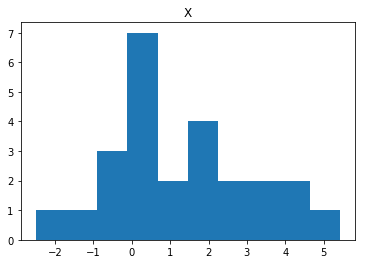

In [5]:
plt.hist(X, bins=10)
plt.title("X")

In [11]:
## MLE
uhat = X.mean()
sigmahat = np.sqrt(((X-uhat)**2).mean())

tauhat = uhat + 1.65 * sigmahat
print("MLE for tau: ", tauhat)

sehat = np.sqrt(((1+1.65)**2 * sigmahat**2) / X.shape[0])
print("SE from delta method: ", sehat)

MLE for tau:  4.18976447088
SE from delta method:  0.963303739131


In [12]:
## bootstrap to get SE
n = X.shape[0]
B = 1000
tauB = np.zeros((B, ))
for i in range(B):
    XX = np.random.choice(X, size=n, replace=True)
    uB = XX.mean()
    sigmaB = np.sqrt(((XX-uB)**2).mean())
    tauB[i] = uB + 1.65 * sigmaB

seB = np.sqrt(((tauB - tauB.mean())**2).mean())
print("SE from bootstrap: ", seB)

SE from bootstrap:  0.638794446432
